# Fantasy Baseball Analysis

This notebook demonstrates how to use the Fantasy Baseball Draft Tool for data analysis and player projections.

## Setup

First, let's import the necessary modules and set up our environment.

In [17]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the parent directory to the path so we can import our modules
sys.path.insert(0, os.path.abspath('..'))

from src.data_processing.process_retrosheet import process_multiple_seasons
from src.analysis.stats_analyzer import StatsAnalyzer
from src.forecasting.forecaster import PlayerForecaster
from src.ranking.player_ranker import PlayerRanker

# Set up plotting
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Data Processing

First, we need to process the Retrosheet data into player statistics. This step assumes you have already downloaded the Retrosheet data to the `data/raw/` directory.

**Note:** This step can take a while to run, depending on the amount of data.

In [18]:
# Define the years to process
start_year = 2014
end_year = 2023

# Process the data
# Uncomment the following line to run the data processing
batting_stats, pitching_stats = process_multiple_seasons(start_year, end_year, 'data/raw', 'data/processed')

Processing seasons: 100%|██████████| 10/10 [00:00<00:00, 678.98it/s]

Processing data for 2014 season
Calculating batting stats for all players
Calculating pitching stats for all players
Saved batting stats to data/processed/batting_stats_2014.csv
Saved pitching stats to data/processed/pitching_stats_2014.csv
Processing data for 2015 season
Calculating batting stats for all players
Calculating pitching stats for all players
Saved batting stats to data/processed/batting_stats_2015.csv
Saved pitching stats to data/processed/pitching_stats_2015.csv
Processing data for 2016 season
Calculating batting stats for all players
Calculating pitching stats for all players
Saved batting stats to data/processed/batting_stats_2016.csv
Saved pitching stats to data/processed/pitching_stats_2016.csv
Processing data for 2017 season
Calculating batting stats for all players
Calculating pitching stats for all players
Saved batting stats to data/processed/batting_stats_2017.csv
Saved pitching stats to data/processed/pitching_stats_2017.csv
Processing data for 2018 season
Calc

## 2. Load Processed Data

If you've already processed the data, you can load it directly from the CSV files.

In [19]:
# Load batting statistics
batting_file = './data/processed/batting_stats_all.csv'
if os.path.exists(batting_file):
    batting_stats = pd.read_csv(batting_file)
    print(f"Loaded batting statistics: {batting_stats.shape}")
    batting_stats.head()
else:
    print(f"Batting statistics file not found: {batting_file}")

Loaded batting statistics: (30, 18)


In [20]:
# Load pitching statistics
pitching_file = './data/processed/pitching_stats_all.csv'
if os.path.exists(pitching_file):
    pitching_stats = pd.read_csv(pitching_file)
    print(f"Loaded pitching statistics: {pitching_stats.shape}")
    pitching_stats.head()
else:
    print(f"Pitching statistics file not found: {pitching_file}")

Loaded pitching statistics: (30, 18)


## 3. Statistical Analysis

Now let's analyze the player statistics to identify trends and patterns.

In [6]:
# Initialize the analyzer
analyzer = StatsAnalyzer()

# Load data
analyzer.load_data(batting_file, pitching_file)

Loading batting data from ./data/processed/batting_stats_all.csv
Loading pitching data from ./data/processed/pitching_stats_all.csv
Loaded 30 batting records and 30 pitching records


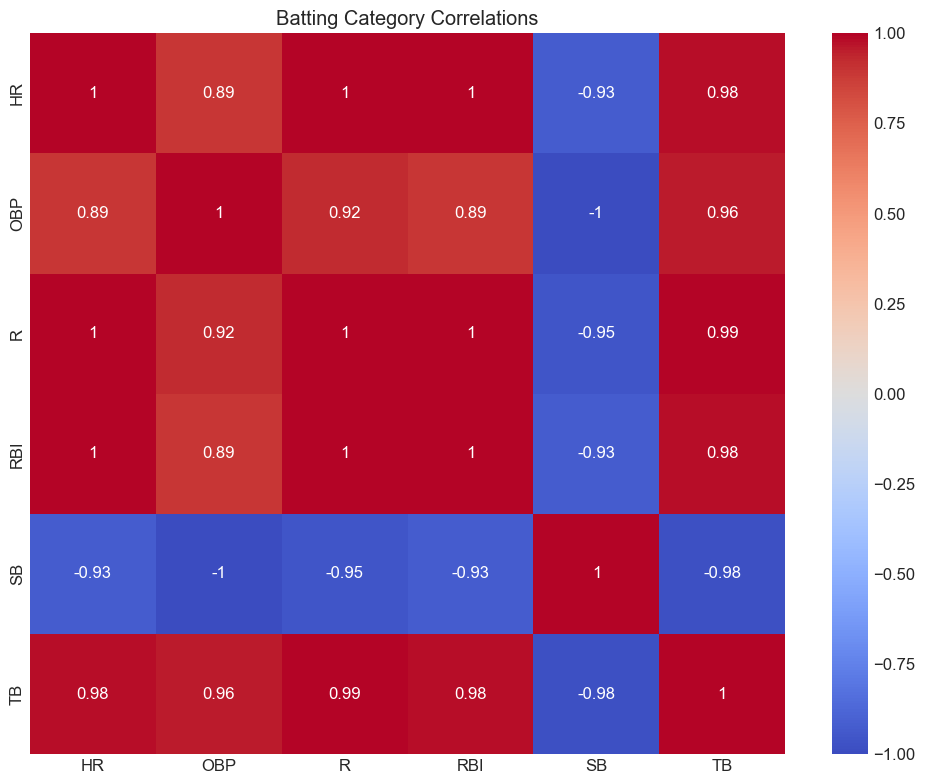

In [7]:
# Analyze batting correlations
batting_corr = analyzer.analyze_batting_correlations()
plt.figure(figsize=(10, 8))
sns.heatmap(batting_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Batting Category Correlations")
plt.tight_layout()

In [21]:
# Analyze pitching correlations
pitching_corr = analyzer.analyze_pitching_correlations()
plt.figure(figsize=(10, 8))
sns.heatmap(pitching_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Pitching Category Correlations")
plt.tight_layout()

KeyError: "['K'] not in index"

In [ ]:
# Analyze batting consistency
batting_consistency = analyzer.analyze_batting_consistency()
batting_consistency.head()

In [ ]:
# Analyze pitching consistency
pitching_consistency = analyzer.analyze_pitching_consistency()
pitching_consistency.head()

In [ ]:
# Analyze category scarcity
batting_scarcity = analyzer.analyze_batting_scarcity()
batting_scarcity

In [ ]:
# Analyze pitching scarcity
pitching_scarcity = analyzer.analyze_pitching_scarcity()
pitching_scarcity

## 4. Player Forecasting

Now let's generate forecasts for the upcoming season.

In [ ]:
# Initialize the forecaster
forecaster = PlayerForecaster()

# Load data
forecaster.load_data(batting_file, pitching_file)

In [ ]:
# Train batting models
# Note: This can take a while to run
# batting_models = forecaster.train_batting_models()

In [ ]:
# Train pitching models
# Note: This can take a while to run
# pitching_models = forecaster.train_pitching_models()

In [ ]:
# Generate forecasts
# Note: This requires trained models
# batting_forecasts, pitching_forecasts = forecaster.generate_all_forecasts('../data/projections')

## 5. Load Forecasts

If you've already generated forecasts, you can load them directly from the CSV files.

In [ ]:
# Load batting forecasts
batting_forecasts_file = '../data/projections/batting_forecasts.csv'
if os.path.exists(batting_forecasts_file):
    batting_forecasts = pd.read_csv(batting_forecasts_file)
    print(f"Loaded batting forecasts: {batting_forecasts.shape}")
    batting_forecasts.head()
else:
    print(f"Batting forecasts file not found: {batting_forecasts_file}")

In [ ]:
# Load pitching forecasts
pitching_forecasts_file = '../data/projections/pitching_forecasts.csv'
if os.path.exists(pitching_forecasts_file):
    pitching_forecasts = pd.read_csv(pitching_forecasts_file)
    print(f"Loaded pitching forecasts: {pitching_forecasts.shape}")
    pitching_forecasts.head()
else:
    print(f"Pitching forecasts file not found: {pitching_forecasts_file}")

## 6. Player Ranking

Now let's rank players based on their projected fantasy value.

In [ ]:
# Initialize the ranker
ranker = PlayerRanker()

# Load projections
ranker.load_projections(batting_forecasts_file, pitching_forecasts_file)

In [ ]:
# Rank batters
batting_rankings = ranker.rank_batters()
batting_rankings.head(10)

In [ ]:
# Rank pitchers
pitching_rankings = ranker.rank_pitchers()
pitching_rankings.head(10)

In [ ]:
# Create overall rankings
overall_rankings = ranker.create_overall_rankings()
overall_rankings.head(10)

In [ ]:
# Plot value distribution
value_plot = ranker.plot_value_distribution(n=50)
plt.title("Value Distribution of Top 50 Players")
plt.tight_layout()

## 7. Save Rankings

Finally, let's save the rankings to CSV files.

In [ ]:
# Save rankings
ranker.save_rankings('../data/rankings')

## Conclusion

In this notebook, we've demonstrated how to use the Fantasy Baseball Draft Tool to:

1. Process Retrosheet data into player statistics
2. Analyze player statistics to identify trends and patterns
3. Generate forecasts for the upcoming season
4. Rank players based on their projected fantasy value

You can now use the rankings to help you make informed decisions during your fantasy baseball draft.